In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


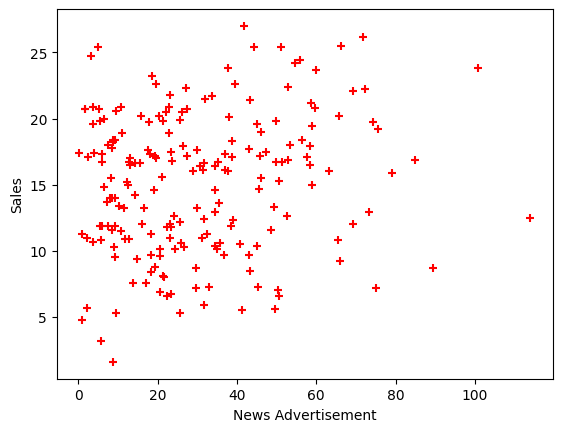

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel('News Advertisement')
plt.ylabel('Sales')
plt.scatter(df.Newspaper, df.Sales, color='red', marker='+')

In [29]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [33]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [34]:
model = LinearRegression()

In [35]:
model.fit(X,y)

LinearRegression()

In [39]:
y_predicted = model.predict(X)
y_predicted

array([21.22097209, 11.26824775, 10.49620897, 17.31244651, 15.64413685,
       10.35633677, 11.2732847 , 13.27062458,  5.31839603, 15.78871013,
        8.8527202 , 18.88400523,  9.69879662, 10.74921373, 19.27328852,
       20.38554445, 12.27105794, 24.20214502, 10.5924398 , 15.20872794,
       19.49794066, 18.10414656,  7.06177654, 18.87221072,  9.37145421,
       19.31996936, 15.54479137, 19.49216302, 21.07865408, 10.19471067,
       23.61492832, 12.64683045, 10.08782551, 21.2260486 ,  9.98787085,
       20.89407055, 23.84503494, 13.99342411,  9.8404516 , 21.08344935,
       18.04712878, 17.84885818, 23.57494339, 16.79762772,  8.75617872,
       16.57668108, 10.58020572, 22.13342743, 18.70257411,  9.53181337,
       15.84670856, 11.11990058, 20.88243422, 19.53008343, 22.01500291,
       20.76038994,  8.04320903, 14.10063486, 21.4222098 , 19.25650785,
        7.75915886, 23.43911942, 19.32168181, 13.3867616 , 16.35231896,
        9.37729644,  8.97313482, 13.7643628 , 20.49677834, 21.13

In [40]:
mse = mean_squared_error(y, y_predicted)
mse

2.706006147627315

In [41]:
r2 = r2_score(y, y_predicted)
r2 # 90 percent accuracy 0.62 = 62 %

0.9025912899684558

In [45]:
model.intercept_

4.625124078808653

In [ ]:
# y = m1 * TV + m2 * Radio + m3 * Newspaper + b

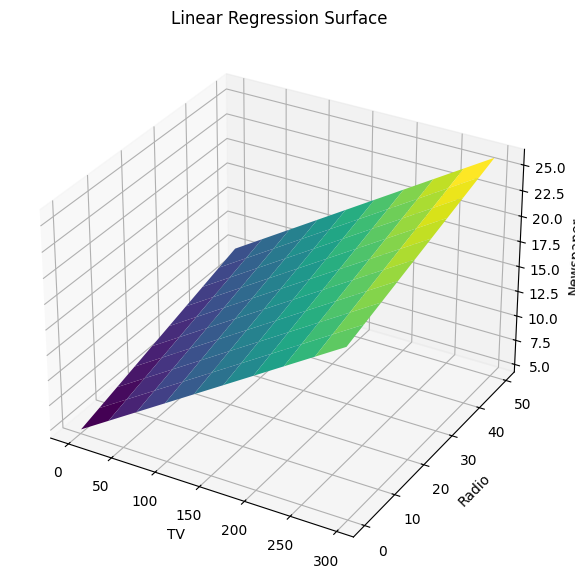

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you already have your model and input features (TV, Radio, Newspaper)

# Create meshgrid for TV and Radio (as they are two features we want to visualize)
tv_range = np.linspace(X['TV'].min(), X['TV'].max(), 10)
radio_range = np.linspace(X['Radio'].min(), X['Radio'].max(), 10)
tv_grid, radio_grid = np.meshgrid(tv_range, radio_range)

# Predict the Newspaper values from the model
# For each pair of (TV, Radio), we can compute the corresponding Newspaper values using the model coefficients
newspaper_grid = model.intercept_ + model.coef_[0] * tv_grid + model.coef_[1] * radio_grid

# Plotting the 3D regression surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(tv_grid, radio_grid, newspaper_grid, cmap='viridis', edgecolor='none')

# Add labels to the axes
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Newspaper')
ax.set_title('Linear Regression Surface')

# Show the plot
plt.show()


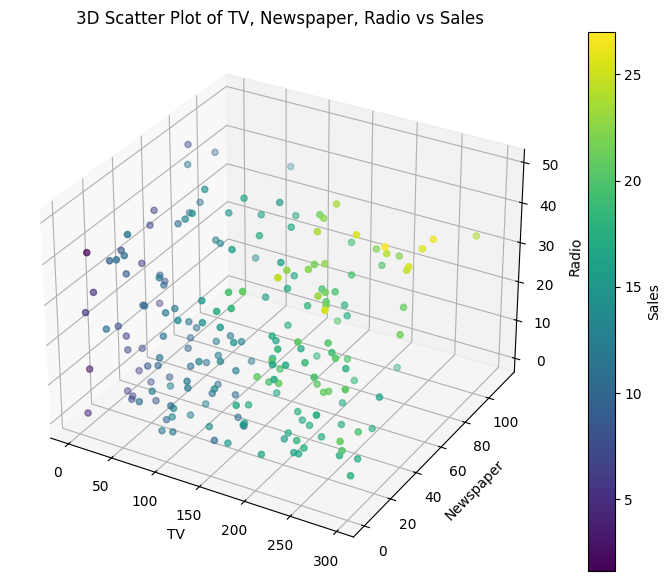

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


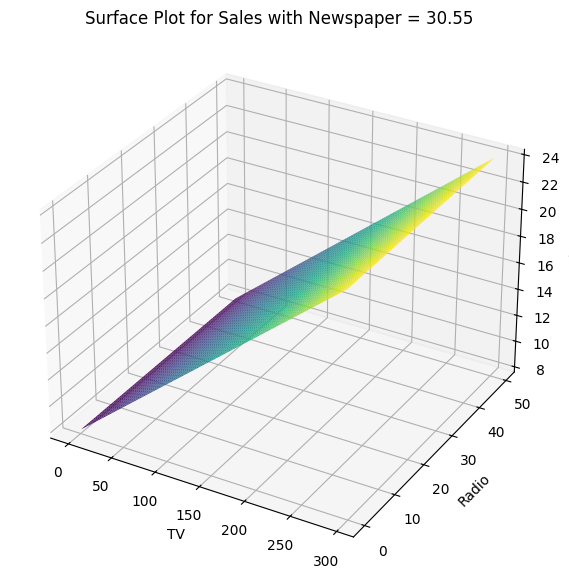

In [51]:
# 3D Scatter Plot where TV, Newspaper, and Radio are on the axes and Sales is represented by color intensity
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors corresponding to Sales
img = ax.scatter(X['TV'], X['Newspaper'], X['Radio'], c=y, cmap='viridis')

# Labels for the axes
ax.set_xlabel('TV')
ax.set_ylabel('Newspaper')
ax.set_zlabel('Radio')

# Add color bar to indicate sales values
fig.colorbar(img, ax=ax, label='Sales')

# Set the title
ax.set_title('3D Scatter Plot of TV, Newspaper, Radio vs Sales')

# Show the plot
plt.show()

# 4D Surface Plot with one variable held constant (e.g., Newspaper = mean of the data)
# Create meshgrid for TV and Radio
tv_range = np.linspace(X['TV'].min(), X['TV'].max(), 100)
radio_range = np.linspace(X['Radio'].min(), X['Radio'].max(), 100)
tv_grid, radio_grid = np.meshgrid(tv_range, radio_range)

# Use the model to predict sales for each combination of TV and Radio
# Set Newspaper to a fixed value (mean of the dataset)
newspaper_value = X['Newspaper'].mean()
sales_grid = model.predict(np.c_[tv_grid.ravel(), np.full_like(tv_grid.ravel(), newspaper_value), radio_grid.ravel()])

# Reshape sales_grid to match the meshgrid shape
sales_grid = sales_grid.reshape(tv_grid.shape)

# Plotting the 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(tv_grid, radio_grid, sales_grid, cmap='viridis', edgecolor='none')

# Labels for the axes
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

# Set the title
ax.set_title(f"Surface Plot for Sales with Newspaper = {newspaper_value:.2f}")

# Show the plot
plt.show()